In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [3]:
from plotly.subplots import make_subplots

In [4]:
df = pd.read_csv("Travel_scrape.csv")

In [5]:
df.head(10)

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time,Unnamed: 6
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,0:00:00,NaN
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,1:00:00,NaN
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,2:00:00,NaN
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,3:00:00,NaN
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,4:00:00,NaN
5,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,5:00:00,NaN
6,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,6:00:00,NaN
7,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,7:00:00,NaN
8,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,8:00:00,NaN
9,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$92,2022-08-03,2022-08-03,9:00:00,NaN


In [6]:
# df.drop('Unnamed: 6', axis='columns', inplace=True)
# df.head()
type(df['Rate'][0])

str

In [7]:
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
df['Search Date'] = pd.to_datetime(df['Search Date'])

In [8]:
df.dtypes

Hotel                    object
Room Type                object
Rate                     object
Check-in Date    datetime64[ns]
Search Date      datetime64[ns]
Search Time              object
Unnamed: 6              float64
dtype: object

In [9]:
len(df['Hotel'].unique())

7

In [10]:
res = df.isna().sum()
res

Hotel               0
Room Type           0
Rate                0
Check-in Date       0
Search Date         0
Search Time         0
Unnamed: 6       8051
dtype: int64

In [11]:
df['Date_gap'] = df['Check-in Date'] - df['Search Date']

In [12]:
df.tail()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time,Unnamed: 6,Date_gap
8046,Tuscany Suites & Casino,Executive Suite,US$121,2022-08-20,2022-08-07,21:00:00,NaN,13 days
8047,Tuscany Suites & Casino,Executive Suite,US$139,2022-08-20,2022-08-07,22:00:00,NaN,13 days
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,US$168,2022-08-20,2022-08-07,23:00:00,NaN,13 days
8049,Tuscany Suites & Casino,Executive Suite,US$143,2022-08-20,2022-08-08,0:00:00,NaN,12 days
8050,Tuscany Suites & Casino,Executive Double Room,US$147,2022-08-20,2022-08-08,0:00:00,NaN,12 days


In [13]:
# Convert All column values in to String

df[[ "Hotel", "Room Type", "Rate", "Check-in Date", "Search Date", "Search Time","Date_gap"]] = df[["Hotel", "Room Type", "Rate", "Check-in Date", "Search Date", "Search Time","Date_gap"]].astype(str)

df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)


In [14]:
df['Rate'] = df['Rate'].apply(lambda x: x[3:])

In [15]:
df['year'] = pd.DatetimeIndex(df['Check-in Date']).year
df['month'] = pd.DatetimeIndex(df['Check-in Date']).month

In [16]:
type(df['Rate'][0])

str

In [17]:
df.tail()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time,Unnamed: 6,Date_gap,year,month
8046,Tuscany Suites & Casino,Executive Suite,121,2022-08-20,2022-08-07,21:00:00,NaN,13,2022,8
8047,Tuscany Suites & Casino,Executive Suite,139,2022-08-20,2022-08-07,22:00:00,NaN,13,2022,8
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,168,2022-08-20,2022-08-07,23:00:00,NaN,13,2022,8
8049,Tuscany Suites & Casino,Executive Suite,143,2022-08-20,2022-08-08,0:00:00,NaN,12,2022,8
8050,Tuscany Suites & Casino,Executive Double Room,147,2022-08-20,2022-08-08,0:00:00,NaN,12,2022,8


In [18]:
# Find Booking Count 
#Which Hotels and Room Types are bussiest 
#df1 = df.groupby(['Hotel','Room Type']).count()['Rate']
df1 = df.groupby(['Hotel']).count()['Rate']
#df1.sort_values(by = 'Hotel',ascending=False).head()
df1

Hotel
2100 SqFt Penthouse Suite W/ Strip Views! POOL GYM     601
Best Western Plus Casino Royale - Center Strip        1158
Ellis Island Hotel Casino & Brewery                   1409
The Cromwell Hotel & Casino                           1351
The Platinum Hotel                                    1164
The Westin Las Vegas Hotel & Spa                       959
Tuscany Suites & Casino                               1409
Name: Rate, dtype: int64

In [19]:
final_data = df[[ "Hotel","Room Type","Date_gap","year","month","Rate"]]
final_data.tail()

,Hotel,Room Type,Date_gap,year,month,Rate
8046,Tuscany Suites & Casino,Executive Suite,13,2022,8,121
8047,Tuscany Suites & Casino,Executive Suite,13,2022,8,139
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,13,2022,8,168
8049,Tuscany Suites & Casino,Executive Suite,12,2022,8,143
8050,Tuscany Suites & Casino,Executive Double Room,12,2022,8,147


# Model Creation

### We will be using the following regression algorithims

####  1)  Linear regression
####  2) KNN Regressor
####  3) Gradient Boost Regressor
####  4) XG Boost Regressor
####  5) Decesion Tree Regressor
####  6) SVM Regression

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split


In [22]:
for i in final_data.select_dtypes('object').columns:
    encoder = LabelEncoder()
    final_data[i] = encoder.fit_transform(final_data[i])

C:\Users\USHAN\AppData\Local\Temp\ipykernel_7604\4257658148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[i] = encoder.fit_transform(final_data[i])


In [23]:
final_data

,Hotel,Room Type,Date_gap,year,month,Rate
0,0,24,1,2022,8,85
1,0,24,1,2022,8,85
2,0,24,1,2022,8,85
3,0,24,1,2022,8,85
4,0,24,1,2022,8,85
...,...,...,...,...,...,...
8046,6,19,6,2022,8,20
8047,6,19,6,2022,8,33
8048,6,8,6,2022,8,57
8049,6,19,5,2022,8,37


In [24]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('Rate',axis=1),final_data['Rate'], test_size=0.33, random_state=42)

In [25]:
#importing all the models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":xgb.XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["RandomForestRegressor"]={"model":RandomForestRegressor(n_estimators=50,max_depth=10)}
models['GradientBoostingRegressor'] = {'model':GradientBoostingRegressor(n_estimators=50,max_depth=10)}

In [28]:
X = final_data.drop('Rate',axis=1)
y = final_data['Rate']

## Automatic Kfold Cross validation

In [29]:
#cross validation to get the best model
cv = KFold(n_splits=5)
for key,item in models.items():
    reg_model = item['model']
    print(item['model'])
    score = cross_val_score(estimator=reg_model,X = X,y = y,cv=cv,scoring='r2')
    print(score)

KNeighborsRegressor(n_neighbors=50)
[  0.21540664   0.08872352  -0.46344142 -11.88290358  -0.22364421]
LinearRegression()
[  0.07743448   0.17212249  -0.3827779  -14.14515604  -0.20127923]
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=5,
             num_parallel_tree=None, predictor=None, random_state=1,
             reg_alpha=None, reg_lambda=None, ...)
[-1.26192952 -0.08586487 -0.73534968 -4.14008863 -0.11882748]
RandomForestRegressor(max_de

In [30]:
#Clearly the Gradient Boosting algorithm does better in estimating, let us explore

In [31]:
reg_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=50)

In [32]:
predicted = reg_model.predict(X_test)

In [33]:
predicted

array([ 17.67682355,  35.79377285,  57.21600418, ..., 120.24092646,
        74.99859867,  60.46117731])

In [34]:
actual_values = y_test.values

In [35]:
actual_values

array([ 10,   0,  58, ..., 160,  70,  58])

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(actual_values,predicted)

18.30838683607217

In [38]:
reg_model.score(X_test,y_test)

0.6379047198811006

## Not much Accurate

In [39]:
final_model = GradientBoostingRegressor(max_depth=100,min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [40]:
final_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=100)

In [41]:
final_model.score(X_test,y_test)

0.6352655027316739

In [42]:
#Final predictions
Predictions = final_model.predict(X_test)
Actual = y_test.values

<AxesSubplot:>

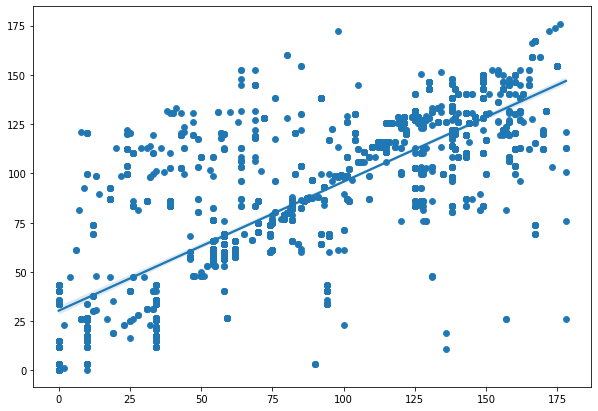

In [43]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = Actual,y = Predictions)
sns.regplot(x = Actual,y = Predictions)

In [55]:
#  Not much of the data is along the reg fit but may be due to cause of some outliers some predictions are off